In [1]:
import pickle
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import autoreload
%load_ext autoreload
%autoreload 2

In [7]:
data = pickle.load(open('cleaned_training.p', 'rb'))

In [8]:
from data_functions import create_training_data

In [9]:
X, Y_root, Y_vowel, Y_consonant = create_training_data(data)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X, Y_root, Y_vowel, Y_consonant, test_size=0.05, random_state=42)

In [11]:
from keras.models import Model, load_model, Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input

Using TensorFlow backend.


In [5]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = MaxPool2D(pool_size=(3, 3))(model)
model = Conv2D(filters=16, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.1)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 64,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/64
171718/171718 [==============================] - 38s 221us/step - loss: 4.9110 - dense_4_loss: 3.5061 - dense_5_loss: 0.7508 - dense_6_loss: 0.6536 - dense_4_accuracy: 0.1766 - dense_5_accuracy: 0.7355 - dense_6_accuracy: 0.7707 - val_loss: 3.4024 - val_dense_4_loss: 2.4680 - val_dense_5_loss: 0.4844 - val_dense_6_loss: 0.4511 - val_dense_4_accuracy: 0.3347 - val_dense_5_accuracy: 0.8255 - val_dense_6_accuracy: 0.8374
Epoch 2/64
171718/171718 [==============================] - 32s 188us/step - loss: 2.9242 - dense_4_loss: 2.1198 - dense_5_loss: 0.4094 - dense_6_loss: 0.3949 - dense_4_accuracy: 0.4168 - dense_5_accuracy: 0.8558 - dense_6_accuracy: 0.8588 - val_loss: 2.5663 - val_dense_4_loss: 1.8370 - val_dense_5_loss: 0.3816 - val_dense_6_loss: 0.3478 - val_dense_4_accuracy: 0.4811 - val_dense_5_accuracy: 0.8667 - val_dense_6_accuracy: 0.8767
Epoch 3/64
171718/171718 [==============================] - 32s 188us/step - loss: 

In [9]:
# model.save('model_5.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_5_history.p', 'wb'))

Model saved to disk


In [12]:
from keras.models import load_model

In [6]:
model = load_model('model_5.h5')

In [7]:
hist = pickle.load(open('model_5_history.p', 'rb'))

In [13]:
def plot_loss(model, hist):
    epochs = len(hist.history['loss'])
    loss_names = []
    for name in model.output_names:
        loss_names.append(name + '_loss')
        loss_names.append('val_' +name + '_loss')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history['loss'], label='train_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[0]], label='train_root_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[2]], label='train_vowel_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[4]], label='train_consonant_loss')
    
    plt.plot(np.arange(0, epochs), hist.history['val_loss'], label='val_train_loss', ls = '--')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[1]], label='val_train_root_loss', ls = '--')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[3]], label='val_train_vowel_loss', ls = '--')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[5]], label='val_train_consonant_loss', ls = '--')
    
    plt.title('Loss against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
def plot_accuracy(model, hist):
    epochs = len(hist.history['loss'])
    acc_names = []
    for name in model.output_names:
        acc_names.append(name + '_accuracy')
        acc_names.append('val_' +name + '_accuracy')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history[acc_names[0]], label='train_root_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[2]], label='train_vowel_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[4]], label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, epochs), hist.history[acc_names[1]], label='val_train_root_accuracy', ls = '--')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[3]], label='val_train_vowel_accuracy', ls = '--')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[5]], label='val_train_consonant_accuracy', ls = '--')
    
    plt.title('Accuracy against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()

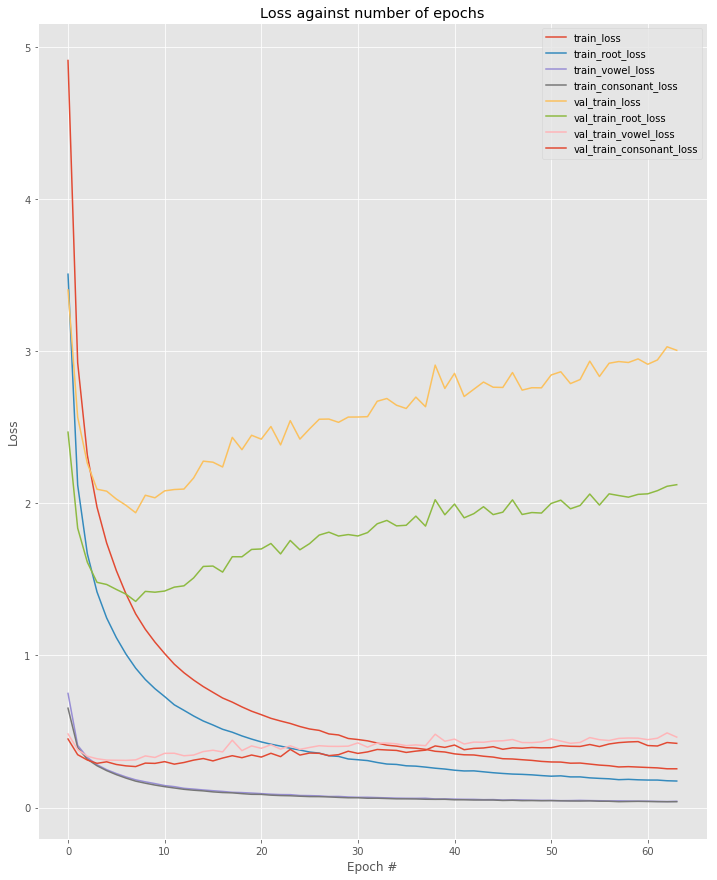

In [10]:
plot_loss(model,hist)

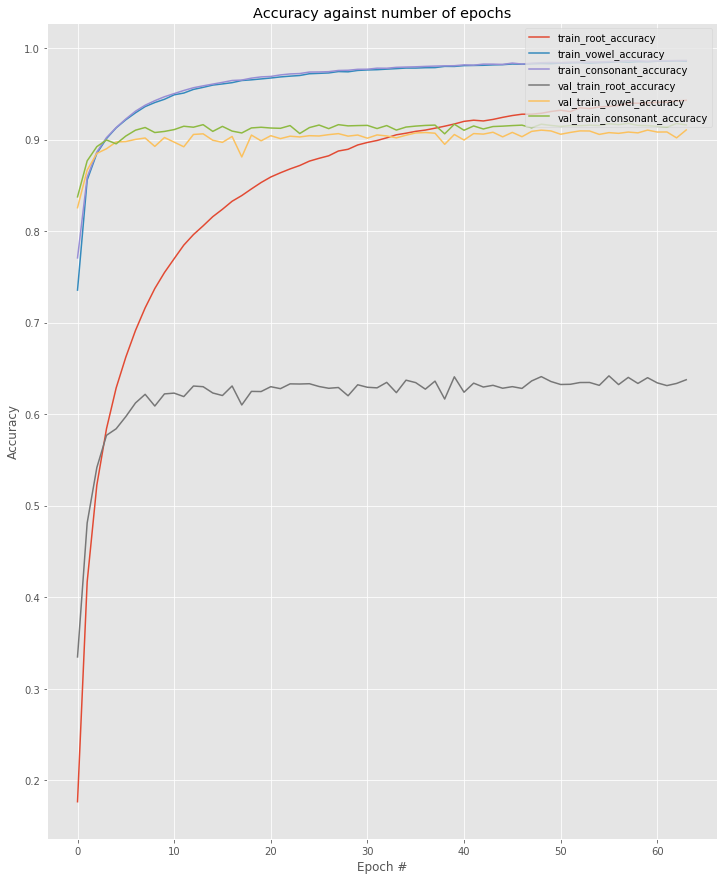

In [11]:
plot_accuracy(model, hist)

In [17]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
hist= model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 16,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/16
171718/171718 [==============================] - 165s 959us/step - loss: 6.2537 - dense_15_loss: 4.2521 - dense_16_loss: 1.0692 - dense_17_loss: 0.9319 - dense_15_accuracy: 0.0739 - dense_16_accuracy: 0.6533 - dense_17_accuracy: 0.7117 - val_loss: 4.5236 - val_dense_15_loss: 3.3855 - val_dense_16_loss: 0.6172 - val_dense_17_loss: 0.5215 - val_dense_15_accuracy: 0.1619 - val_dense_16_accuracy: 0.7889 - val_dense_17_accuracy: 0.8151
Epoch 2/16
171718/171718 [==============================] - 164s 956us/step - loss: 4.2192 - dense_15_loss: 3.0934 - dense_16_loss: 0.6136 - dense_17_loss: 0.5120 - dense_15_accuracy: 0.2113 - dense_16_accuracy: 0.7865 - dense_17_accuracy: 0.8217 - val_loss: 3.1480 - val_dense_15_loss: 2.3428 - val_dense_16_loss: 0.4437 - val_dense_17_loss: 0.3632 - val_dense_15_accuracy: 0.3621 - val_dense_16_accuracy: 0.8475 - val_dense_17_accuracy: 0.8725
Epoch 3/16
171718/171718 [==============================]

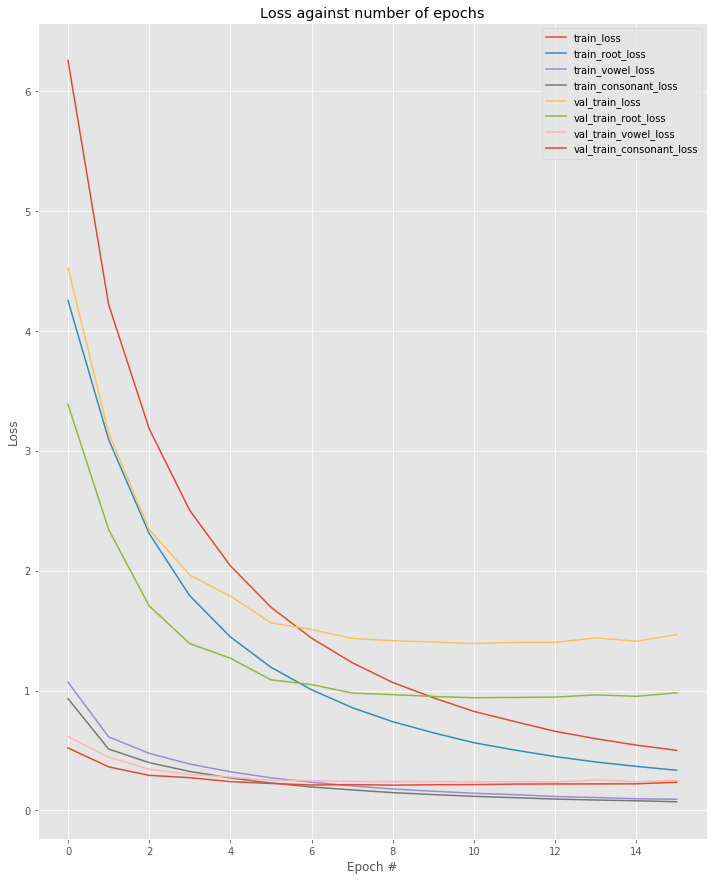

In [19]:
plot_loss(model, hist)

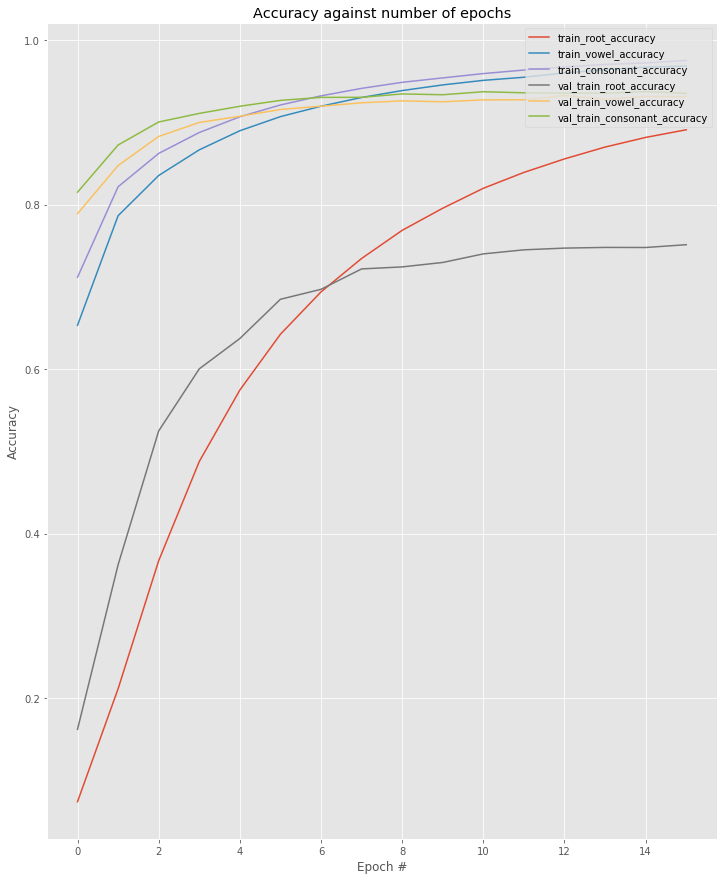

In [20]:
plot_accuracy(model, hist)

In [21]:
# model.save('model_6.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_6_history.p', 'wb'))

Model saved to disk


In [8]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)


model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
# model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 32,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 199s 1ms/step - loss: 4.1206 - dense_3_loss: 2.8960 - dense_4_loss: 0.6496 - dense_5_loss: 0.5742 - dense_3_accuracy: 0.3001 - dense_4_accuracy: 0.7906 - dense_5_accuracy: 0.8163 - val_loss: 3.4865 - val_dense_3_loss: 2.2405 - val_dense_4_loss: 0.8502 - val_dense_5_loss: 0.3950 - val_dense_3_accuracy: 0.4570 - val_dense_4_accuracy: 0.7613 - val_dense_5_accuracy: 0.8776
Epoch 2/32
171718/171718 [==============================] - 192s 1ms/step - loss: 1.5143 - dense_3_loss: 1.0464 - dense_4_loss: 0.2437 - dense_5_loss: 0.2242 - dense_3_accuracy: 0.6910 - dense_4_accuracy: 0.9190 - dense_5_accuracy: 0.9247 - val_loss: 1.3817 - val_dense_3_loss: 0.9214 - val_dense_4_loss: 0.2431 - val_dense_5_loss: 0.2191 - val_dense_3_accuracy: 0.7346 - val_dense_4_accuracy: 0.9259 - val_dense_5_accuracy: 0.9316
Epoch 3/32
171718/171718 [==============================] - 192s 1ms/step - loss: 1.0

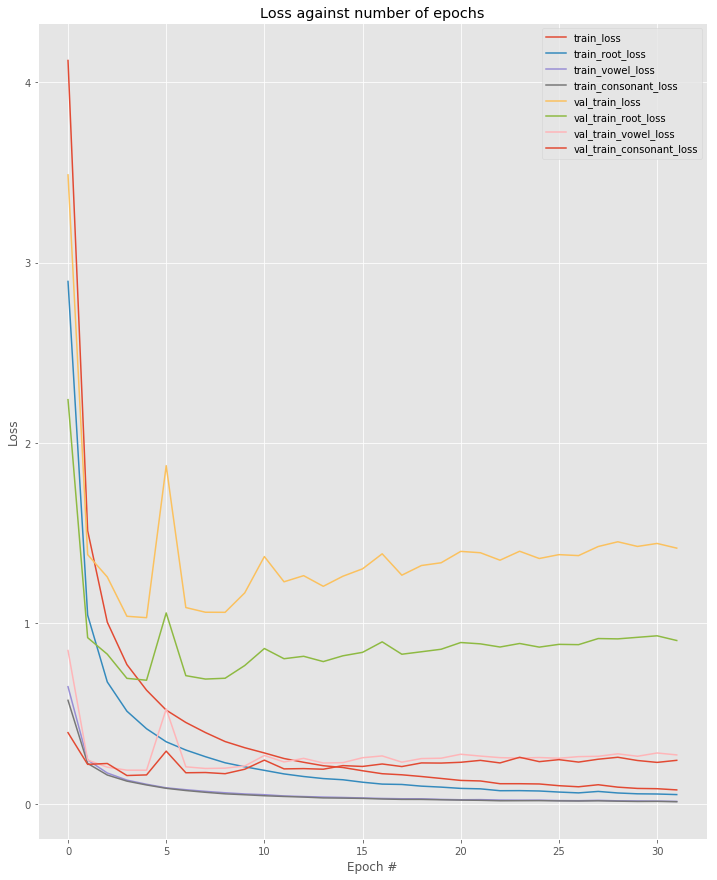

In [10]:
plot_loss(model, hist)

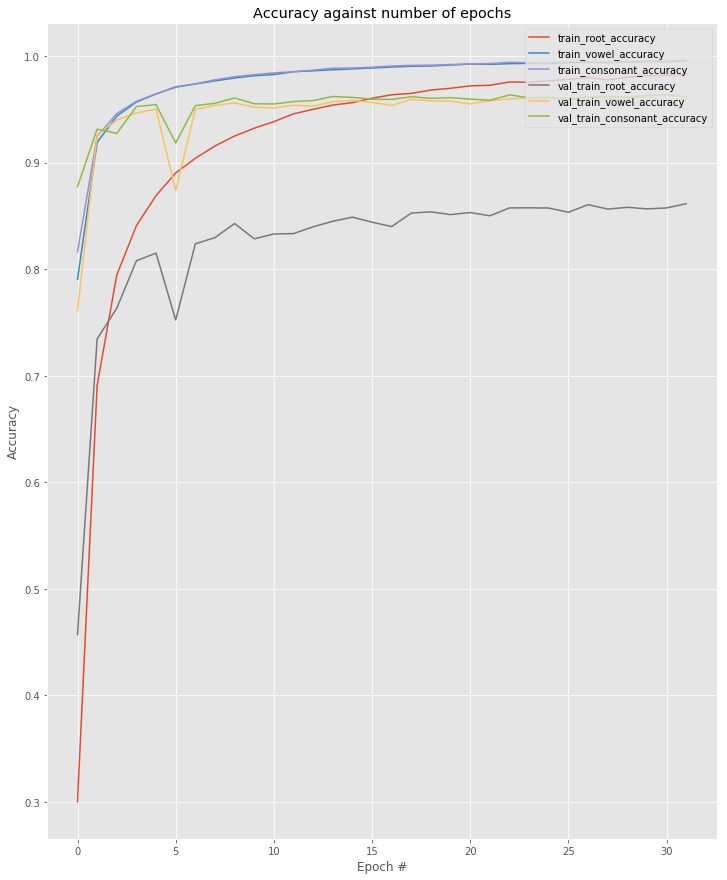

In [11]:
plot_accuracy(model, hist)

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_2[0][0]                   
____________________________________________________________________________________________

In [13]:
# model.save('model_7.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_7_history.p', 'wb'))

Model saved to disk


In [16]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)


model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 32,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 194s 1ms/step - loss: 4.7623 - dense_13_loss: 3.3917 - dense_14_loss: 0.7251 - dense_15_loss: 0.6449 - dense_13_accuracy: 0.1959 - dense_14_accuracy: 0.7586 - dense_15_accuracy: 0.7924 - val_loss: 3.4024 - val_dense_13_loss: 2.1452 - val_dense_14_loss: 0.7758 - val_dense_15_loss: 0.4825 - val_dense_13_accuracy: 0.4148 - val_dense_14_accuracy: 0.7629 - val_dense_15_accuracy: 0.8423
Epoch 2/32
171718/171718 [==============================] - 193s 1ms/step - loss: 2.1235 - dense_13_loss: 1.5070 - dense_14_loss: 0.3329 - dense_15_loss: 0.2834 - dense_13_accuracy: 0.5623 - dense_14_accuracy: 0.8886 - dense_15_accuracy: 0.9040 - val_loss: 1.3792 - val_dense_13_loss: 0.9576 - val_dense_14_loss: 0.2205 - val_dense_15_loss: 0.2010 - val_dense_13_accuracy: 0.7163 - val_dense_14_accuracy: 0.9266 - val_dense_15_accuracy: 0.9333
Epoch 3/32
171718/171718 [==============================] - 1

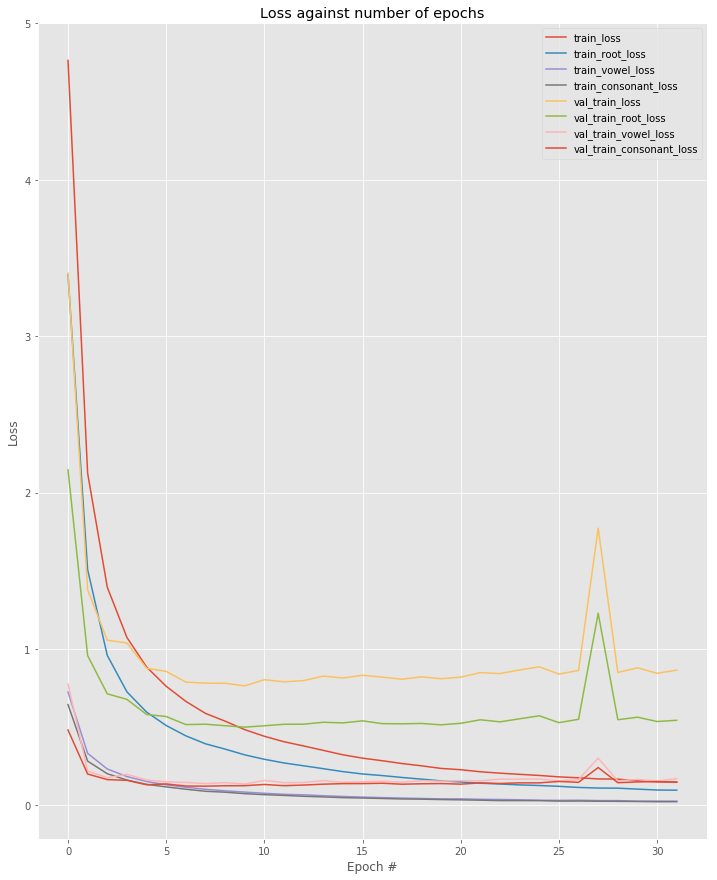

In [18]:
plot_loss(model, hist)

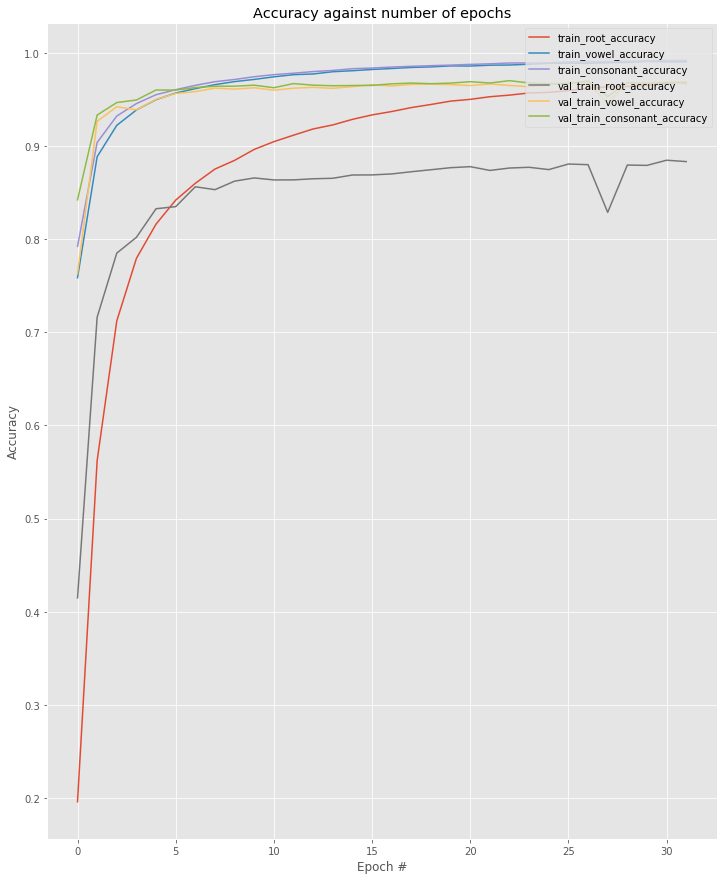

In [19]:
plot_accuracy(model, hist)

In [20]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
# early stop at 25 epochs
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 25,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/25
171718/171718 [==============================] - 195s 1ms/step - loss: 4.8185 - dense_18_loss: 3.4345 - dense_19_loss: 0.7381 - dense_20_loss: 0.6453 - dense_18_accuracy: 0.1865 - dense_19_accuracy: 0.7581 - dense_20_accuracy: 0.7912 - val_loss: 2.7103 - val_dense_18_loss: 2.0986 - val_dense_19_loss: 0.3223 - val_dense_20_loss: 0.2913 - val_dense_18_accuracy: 0.4209 - val_dense_19_accuracy: 0.8945 - val_dense_20_accuracy: 0.9000
Epoch 2/25
171718/171718 [==============================] - 193s 1ms/step - loss: 2.1114 - dense_18_loss: 1.5115 - dense_19_loss: 0.3225 - dense_20_loss: 0.2773 - dense_18_accuracy: 0.5627 - dense_19_accuracy: 0.8915 - dense_20_accuracy: 0.9064 - val_loss: 1.4882 - val_dense_18_loss: 1.0641 - val_dense_19_loss: 0.2328 - val_dense_20_loss: 0.1920 - val_dense_18_accuracy: 0.6904 - val_dense_19_accuracy: 0.9260 - val_dense_20_accuracy: 0.9364
Epoch 3/25
171718/171718 [==============================] - 1

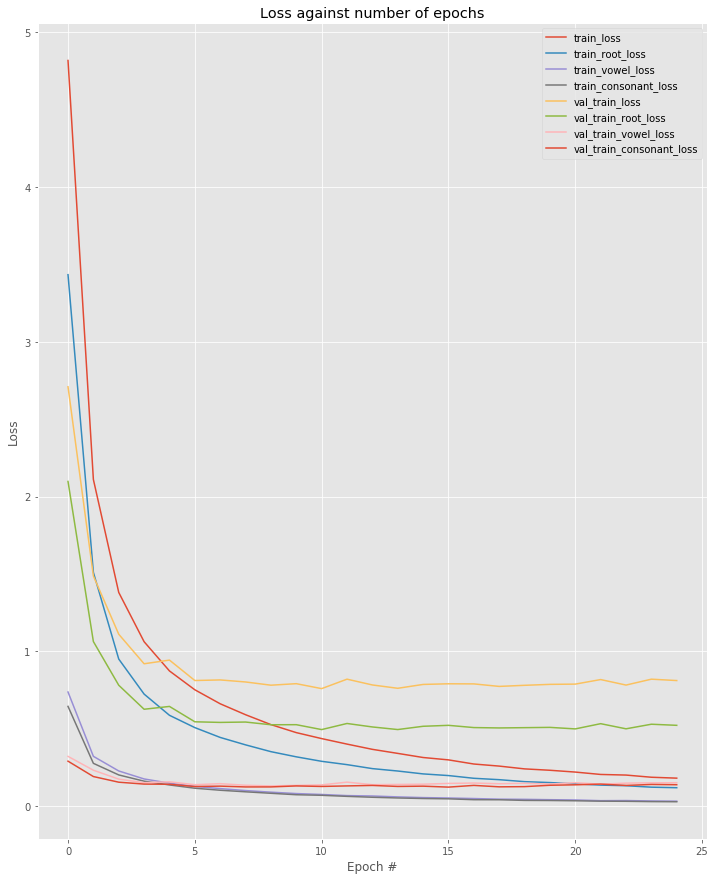

In [26]:
plot_loss(model, hist)

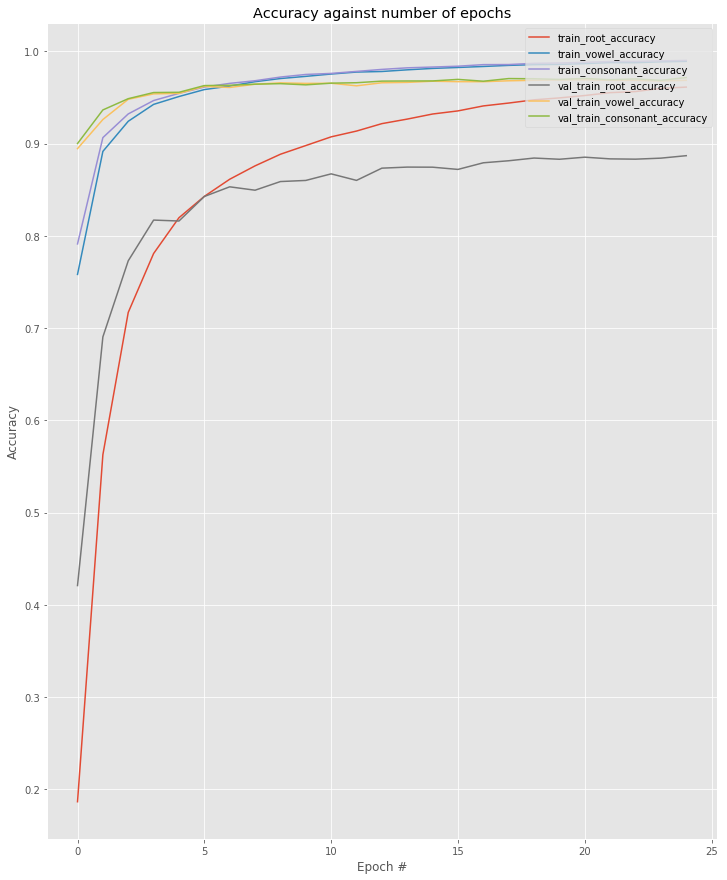

In [27]:
plot_accuracy(model, hist)

In [29]:
model.evaluate(x_test, [y_test_root, y_test_vowel, y_test_consonant])

10042/10042 [==============================] - 6s 584us/step


[0.8075332502472616,
 0.4991380274295807,
 0.1529262363910675,
 0.1557176411151886,
 0.8876717686653137,
 0.9680342674255371,
 0.9664409756660461]

In [24]:
model.metrics_names

['loss',
 'dense_18_loss',
 'dense_19_loss',
 'dense_20_loss',
 'dense_18_accuracy',
 'dense_19_accuracy',
 'dense_20_accuracy']

In [25]:
# model.save('model_8.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_8_history.p', 'wb'))

Model saved to disk


In [30]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Conv2D(filters=128, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.2)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [31]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 32,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 238s 1ms/step - loss: 5.8012 - dense_23_loss: 4.0390 - dense_24_loss: 0.9354 - dense_25_loss: 0.8261 - dense_23_accuracy: 0.0908 - dense_24_accuracy: 0.6892 - dense_25_accuracy: 0.7345 - val_loss: 3.5119 - val_dense_23_loss: 2.7135 - val_dense_24_loss: 0.4169 - val_dense_25_loss: 0.3825 - val_dense_23_accuracy: 0.2628 - val_dense_24_accuracy: 0.8591 - val_dense_25_accuracy: 0.8720
Epoch 2/32
171718/171718 [==============================] - 236s 1ms/step - loss: 2.6880 - dense_23_loss: 1.9835 - dense_24_loss: 0.3843 - dense_25_loss: 0.3199 - dense_23_accuracy: 0.4344 - dense_24_accuracy: 0.8714 - dense_25_accuracy: 0.8918 - val_loss: 1.4336 - val_dense_23_loss: 1.0157 - val_dense_24_loss: 0.2251 - val_dense_25_loss: 0.1935 - val_dense_23_accuracy: 0.6969 - val_dense_24_accuracy: 0.9283 - val_dense_25_accuracy: 0.9383
Epoch 3/32
171718/171718 [==============================] - 2

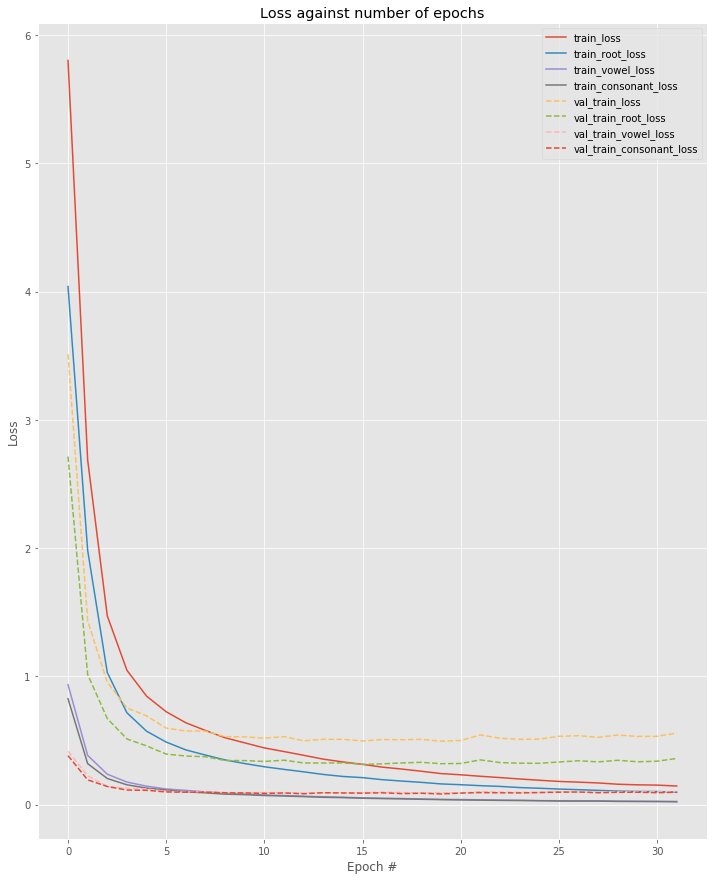

In [37]:
plot_loss(model, hist)

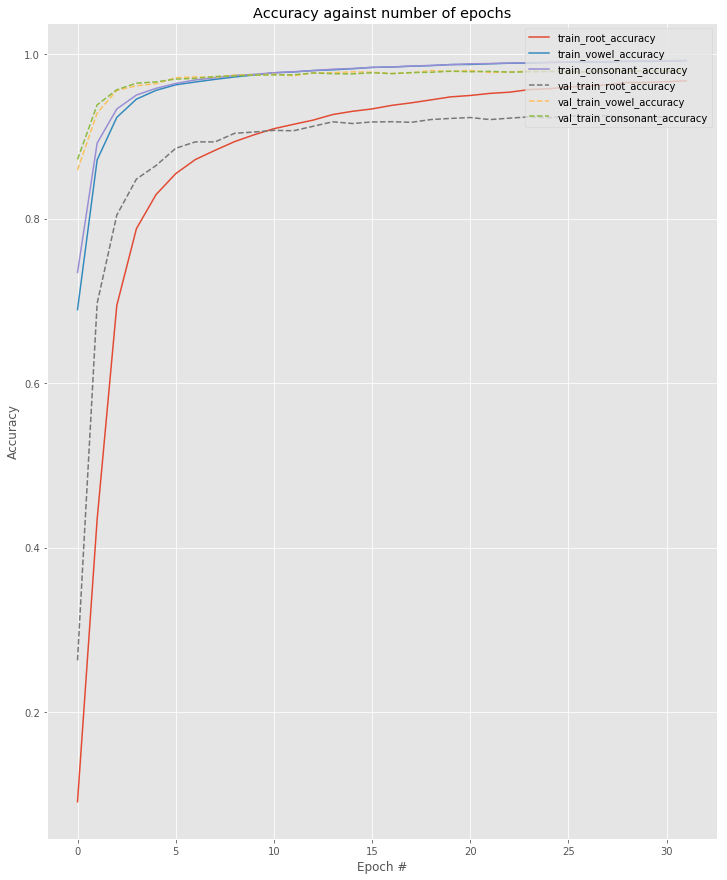

In [38]:
plot_accuracy(model, hist)

In [39]:
# model.save('model_9.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_9_history.p', 'wb'))

Model saved to disk


In [14]:
model= load_model('model_9.h5')
hist = pickle.load(open('model_9_history.p', 'rb'))

In [15]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 64, 64, 32)   9248        conv2d_21[0][0]                  
__________________________________________________________________________________________________
batch_normalization_17 (BatchNo (None, 64, 64, 32)   128         conv2d_22[0][0]                  
____________________________________________________________________________________________

In [15]:
model.evaluate(x_test, [y_test_root, y_test_vowel, y_test_consonant])

10042/10042 [==============================] - 13s 1ms/step


[0.5500095403038916,
 0.35069772601127625,
 0.10413545370101929,
 0.09530599415302277,
 0.9235212206840515,
 0.9796853065490723,
 0.9808803200721741]

In [17]:
dict(zip(model.metrics_names,model.evaluate(x_test, [y_test_root, y_test_vowel, y_test_consonant])))

10042/10042 [==============================] - 8s 758us/step


{'dense_23_accuracy': 0.9235212206840515,
 'dense_23_loss': 0.35069772601127625,
 'dense_24_accuracy': 0.9796853065490723,
 'dense_24_loss': 0.10413545370101929,
 'dense_25_accuracy': 0.9808803200721741,
 'dense_25_loss': 0.09530599415302277,
 'loss': 0.5500095388556211}

In [37]:
model.predict(x_test[:2])

[array([[0.00000000e+00, 0.00000000e+00, 7.01879860e-32, 1.71795145e-25,
         2.79152113e-26, 6.35993406e-29, 0.00000000e+00, 1.54402829e-30,
         2.06667996e-32, 0.00000000e+00, 0.00000000e+00, 3.89907597e-32,
         1.08415850e-35, 5.76107801e-24, 1.21860386e-27, 5.88006762e-30,
         1.11018140e-21, 1.01225224e-35, 2.14827555e-19, 4.04596898e-21,
         1.14920904e-27, 6.59328454e-29, 7.77863604e-21, 2.69323343e-21,
         5.49208157e-24, 8.51790486e-29, 1.03147811e-33, 3.02280704e-30,
         9.36556498e-26, 3.18615555e-12, 5.94046035e-25, 5.71967923e-28,
         9.78078829e-19, 3.44560916e-26, 7.90780487e-26, 6.20410582e-21,
         2.18666498e-18, 4.98585941e-22, 4.86587680e-26, 5.29865485e-24,
         1.21126623e-10, 4.01083695e-15, 7.51485976e-18, 4.17166803e-19,
         7.02145717e-15, 4.10276662e-18, 4.83949525e-27, 3.64854259e-28,
         2.50585861e-32, 1.86931556e-37, 4.74897572e-32, 5.54503432e-21,
         1.14120057e-21, 2.97029772e-28, 1.12405084

In [64]:
np.argmax(model.predict(x_test[:5])[0], axis= 1)

array([151,  23,  81,  38,  32])

In [63]:
np.argmax(y_test_root[:5], axis= 1)

array([151,  23,  81, 107,  32])

In [47]:
np.argmax(model.predict(x_test[:5])[1], axis= 1)

array([5, 7, 1, 8, 7])

In [48]:
np.argmax(y_test_vowel[:5], axis= 1)

array([5, 7, 1, 8, 7])

In [49]:
np.argmax(model.predict(x_test[:5])[2], axis= 1)

array([0, 2, 4, 0, 0])

In [50]:
np.argmax(y_test_consonant[:5], axis= 1)

array([0, 2, 4, 0, 0])

In [115]:
idxs = np.random.choice(len(x_test), 16, replace= False)

In [112]:
x_test[idxs[0]].reshape(64,64)*255

array([[247., 247., 249., ..., 248., 249., 248.],
       [251., 248., 250., ..., 247., 251., 248.],
       [249., 250., 251., ..., 246., 248., 249.],
       ...,
       [250., 246., 251., ..., 251., 250., 251.],
       [250., 251., 250., ..., 251., 249., 246.],
       [250., 248., 251., ..., 249., 249., 248.]])

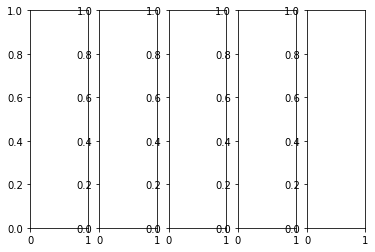

In [81]:
fig, ax = plt.subplots(nrows = 1, ncols= 5)

In [84]:
ax.reshape(1,5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c7036a898>,
      dtype=object)

In [97]:
nrows = int(np.ceil(16/5))

In [98]:
nrows

4

In [103]:
ncols = 5

In [104]:
ncols

5

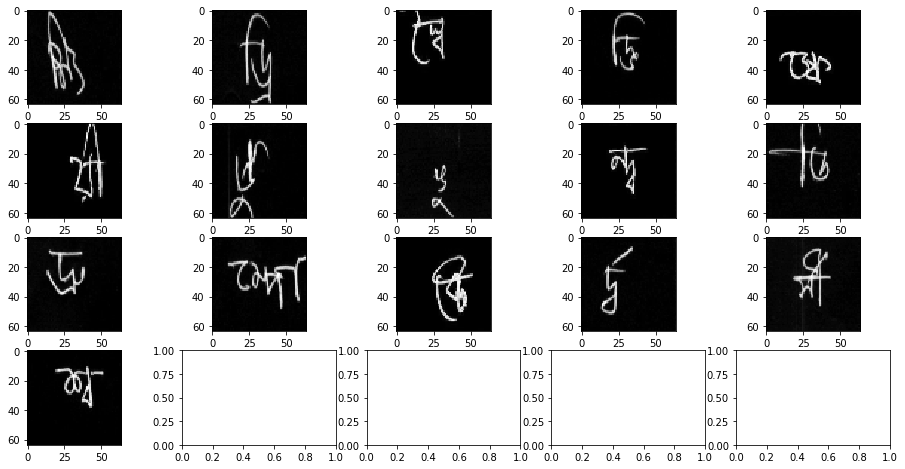

In [125]:
fig, ax = plt.subplots(nrows, ncols, figsize= (16,8))
for i,idx in enumerate(idxs):
    img = x_test[idx].reshape(64,64)
    ax.flatten()[i].imshow(img, cmap= 'gist_gray_r')

In [10]:
from data_functions import show_sample_imgs

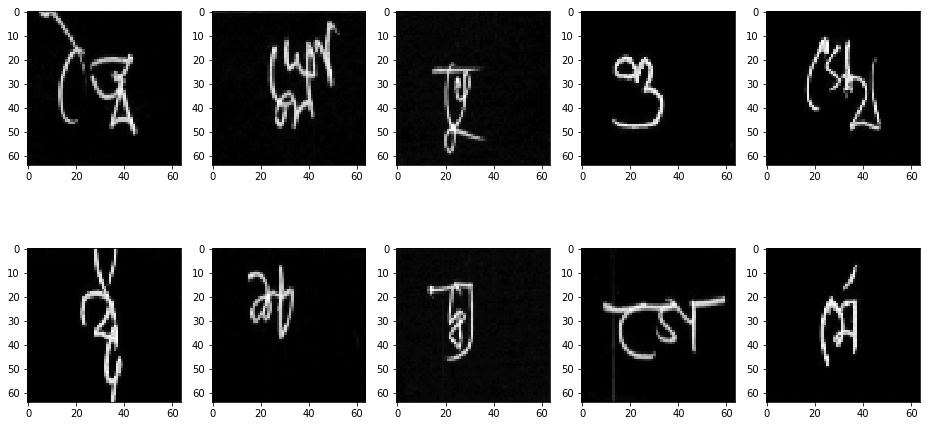

In [13]:
idxs = show_sample_imgs(x_test, 10)

In [14]:
idxs

array([7644, 1160, 7242, 3695, 2974, 4106, 9344, 7580, 1947, 5387])

In [16]:
y_test = [y_test_root, y_test_vowel, y_test_consonant]

In [17]:
y_root = np.argmax(y_test[0][idxs], axis= 1)
y_vowel = np.argmax(y_test[1][idxs], axis= 1)
y_consonant = np.argmax(y_test[2][idxs], axis= 1)

In [18]:
print(y_root, y_vowel, y_consonant)

[155 157 113  62 151  79 134  76  23 115] [8 9 4 0 7 5 0 0 7 7] [0 0 0 0 0 0 0 4 0 2]


In [19]:
root_probas = model.predict(x_test[idxs])[0]
vowel_probas = model.predict(x_test[idxs])[1]
consonant_probas = model.predict(x_test[idxs])[2]
root_pred = np.argmax(root_probas, axis= 1)
vowel_pred = np.argmax(vowel_probas, axis= 1)
consonant_pred = np.argmax(consonant_probas, axis= 1)

In [20]:
print(root_pred, vowel_pred, consonant_pred)

[155 157 113  62 151  79 134  76  23 115] [8 9 4 0 7 5 0 0 7 7] [0 0 0 0 0 0 0 4 0 2]


In [30]:
pd.DataFrame([root_pred, vowel_pred, consonant_pred, y_root, y_vowel, y_consonant], index= pd.MultiIndex.from_arrays(arrays), columns= ['image_{}'.format(i) for i in range(len(y_root))]).T

predicted                 true                
             root vowel consonant root vowel consonant
image_0       155     8         0  155     8         0
image_1       157     9         0  157     9         0
image_2       113     4         0  113     4         0
image_3        62     0         0   62     0         0
image_4       151     7         0  151     7         0
image_5        79     5         0   79     5         0
image_6       134     0         0  134     0         0
image_7        76     0         4   76     0         4
image_8        23     7         0   23     7         0
image_9       115     7         2  115     7         2

In [6]:
columns = [['predicted', 'true'],
          ['root', 'vowel', 'consonant',]]
pd.MultiIndex.from_product(columns)

MultiIndex([('predicted',      'root'),
            ('predicted',     'vowel'),
            ('predicted', 'consonant'),
            (     'true',      'root'),
            (     'true',     'vowel'),
            (     'true', 'consonant')],
           )